In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [4]:
# find the path on your disk
pathName = r"C:\Users\mp5160\Desktop\UDA\Data\NYC_Block_Groups.csv"

In [5]:
# read the csv as a dataframe
df = pd.read_csv(pathName)

In [6]:
df.sample(2)

,INTPTLAT,INTPTLON,GISJOIN,YEAR,Median_age,Population,WhiteAlone,BlackAlone,NativeAlone,BlackAlonWithComb,...,pctCommutePTnsitOver60,pctCommuteWalkBike,pct_LivingAlone65Over,pct_LessThanHighSchool,pctMobileHomes,BlcokG_Area_SqMeter,WaterFront,NearParks,NearMajorParks,boro_name
1171,40.687985,-73.826286,G36008100106001,2012-2016,33.8,1646,200,367,0,397,...,12.211420,2.733900,0.303767,13.91252,0.0,83800.74169,No,No,NO,Queens
5419,40.633826,-74.020885,G36004700130001,2012-2016,35.5,1382,452,0,38,0,...,7.308249,6.005789,1.447178,10.34732,0.0,38923.94465,No,No,NO,Brooklyn


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INTPTLAT                5852 non-null   float64
 1   INTPTLON                5852 non-null   float64
 2   GISJOIN                 5852 non-null   object 
 3   YEAR                    5852 non-null   object 
 4   Median_age              5852 non-null   float64
 5   Population              5852 non-null   int64  
 6   WhiteAlone              5852 non-null   int64  
 7   BlackAlone              5852 non-null   int64  
 8   NativeAlone             5852 non-null   int64  
 9   BlackAlonWithComb       5852 non-null   int64  
 10  Hisp_Latino             5852 non-null   int64  
 11  MedHouseholdIncome      5852 non-null   int64  
 12  PerCapitaIncome         5852 non-null   int64  
 13  MedYearBuilt            5852 non-null   object 
 14  MedianValue             5852 non-null   

In [11]:
df['MedianValue'] = pd.to_numeric(df['MedianValue'], errors='coerce')
df.replace([np.inf, -np.inf,0], np.nan)
# drop nan values
df.dropna(subset=['MedianValue', 'NearMajorParks','boro_name'],inplace=True)


# One-way ANOVA
### differences between multiple groups: we need a categorical variable with more than two groups in it in addition to a numerical variable)

In [7]:
# let's see the mean and median of each group
grp = df.groupby('boro_name')
grp['MedianValue'].agg([np.median, np.mean])

,median,mean
boro_name,,
Bronx,405250.0,3.816601e+05
Brooklyn,631400.0,6.811141e+05
Manhattan,916700.0,1.059690e+06
Queens,478300.0,5.054620e+05
Staten Island,446650.0,4.527568e+05


#### let's plot the math score for the groups

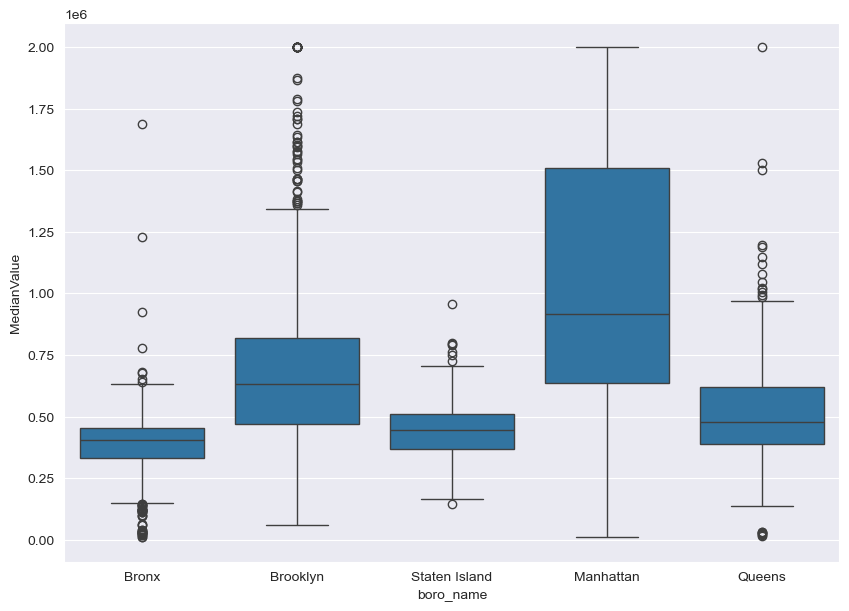

In [12]:
# set the style
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("darkgrid")

fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

sns.boxplot(data=df, x='boro_name', y='MedianValue');

In [10]:
df.sample(2)

,INTPTLAT,INTPTLON,GISJOIN,YEAR,Median_age,Population,WhiteAlone,BlackAlone,NativeAlone,BlackAlonWithComb,...,pctCommutePTnsitOver60,pctCommuteWalkBike,pct_LivingAlone65Over,pct_LessThanHighSchool,pctMobileHomes,BlcokG_Area_SqMeter,WaterFront,NearParks,NearMajorParks,boro_name
3797,40.671714,-73.951719,G36004700317023,2012-2016,28.0,1108,537,302,0,302,...,8.212996,1.444043,1.895307,3.971119,0.0,46568.82367,No,No,NO,Brooklyn
2693,40.790588,-73.831140,G36008100945001,2012-2016,40.3,2054,1125,41,0,41,...,7.887050,0.681597,2.190847,4.381694,0.0,716838.86450,Yes,Yes,NO,Queens


In [11]:
df['boro_name'].unique()

array(['Bronx', 'Brooklyn', 'Staten Island', 'Manhattan', 'Queens'],
      dtype=object)

In [14]:
# we need to pass the dataframe as the input. notice the syntax for columns
my_model = ols('MedianValue ~ boro_name', data = df).fit()
anova_table = sm.stats.anova_lm(my_model, typ=2)
# print the results
print(anova_table)

                 sum_sq      df           F  PR(>F)
boro_name  1.665867e+14     4.0  497.186626     0.0
Residual   3.641250e+14  4347.0         NaN     NaN


### Calculate effect size

In [15]:
# see this page to learn about https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/effectSize
esq_sm = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
print (esq_sm)

0.31389300408349635


## post hoc tests: pair-wise t-tests

In [16]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['MedianValue'],df['boro_name'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()
# reject means that you have to reject the null hypothesis. If the column "reject" is True, then you've found a siginificant relationships between your groups

group1,group2,meandiff,p-adj,lower,upper,reject
Bronx,Brooklyn,299453.9306,0.0,258381.8263,340526.0348,True
Bronx,Manhattan,678029.6579,0.0,628784.6048,727274.7111,True
Bronx,Queens,123801.889,0.0,82425.1534,165178.6245,True
Bronx,Staten Island,71096.7147,0.0097,11660.1487,130533.2807,True
Brooklyn,Manhattan,378575.7274,0.0,339405.2861,417746.1686,True
Brooklyn,Queens,-175652.0416,0.0,-204310.0676,-146994.0156,True
Brooklyn,Staten Island,-228357.2159,0.0,-279757.1535,-176957.2783,True
Manhattan,Queens,-554227.769,0.0,-593717.514,-514738.0239,True
Manhattan,Staten Island,-606932.9432,0.0,-665071.6661,-548794.2204,True
Queens,Staten Island,-52705.1743,0.0428,-104348.8581,-1061.4904,True


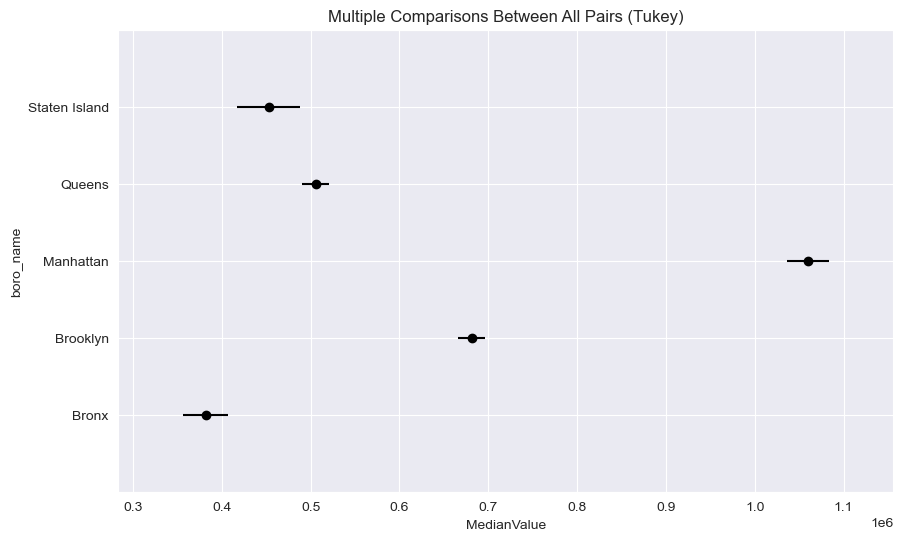

In [17]:
post_hoc_res.plot_simultaneous(ylabel= "boro_name", xlabel= "MedianValue");

### Two-way ANOVA

In [20]:
my_model = ols('MedianValue ~ C(boro_name) + C(NearMajorParks) + C(NearMajorParks):C(boro_name)', data=df).fit()
anova_table = sm.stats.anova_lm(my_model, typ=2)
# print the results
print(anova_table)

                                      sum_sq      df           F    PR(>F)
C(boro_name)                    1.665905e+14     4.0  499.284742  0.000000
C(NearMajorParks)               5.984564e+11     1.0    7.174483  0.007423
C(NearMajorParks):C(boro_name)  1.340475e+12     4.0    4.017507  0.002961
Residual                        3.621861e+14  4342.0         NaN       NaN


## post hoc tests: pair-wise t-tests for two-way ANOVA

In [33]:
import statsmodels.formula.api as smf

# Two-way ANOVA with interaction
model = smf.ols('MedianValue ~ C(boro_name) + C(NearMajorParks) + C(boro_name):C(NearMajorParks)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II sum of squares
print(anova_table)

                                      sum_sq      df           F    PR(>F)
C(boro_name)                    1.665905e+14     4.0  499.284742  0.000000
C(NearMajorParks)               5.984564e+11     1.0    7.174483  0.007423
C(boro_name):C(NearMajorParks)  1.340475e+12     4.0    4.017507  0.002961
Residual                        3.621861e+14  4342.0         NaN       NaN


In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Post-hoc test for boro_name
mc = MultiComparison(df['MedianValue'], df['boro_name'])
tukey_result = mc.tukeyhsd()

# Print the summary
print(tukey_result.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
  group1      group2      meandiff   p-adj     lower        upper     reject
----------------------------------------------------------------------------
    Bronx      Brooklyn  299453.9306    0.0  258381.8263  340526.0348   True
    Bronx     Manhattan  678029.6579    0.0  628784.6048  727274.7111   True
    Bronx        Queens   123801.889    0.0   82425.1534  165178.6245   True
    Bronx Staten Island   71096.7147 0.0097   11660.1487  130533.2807   True
 Brooklyn     Manhattan  378575.7274    0.0  339405.2861  417746.1686   True
 Brooklyn        Queens -175652.0416    0.0 -204310.0676 -146994.0156   True
 Brooklyn Staten Island -228357.2159    0.0 -279757.1535 -176957.2783   True
Manhattan        Queens  -554227.769    0.0  -593717.514 -514738.0239   True
Manhattan Staten Island -606932.9432    0.0 -665071.6661 -548794.2204   True
   Queens Staten Island  -52705.1743 0.0428 -104348.8581   -1061.4904   True

In [ ]:
# Two-way ANOVA
model = smf.ols('MedianValue ~ C(boro_name) + C(NearMajorParks) + C(boro_name):C(NearMajorParks)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                      sum_sq      df           F    PR(>F)
C(boro_name)                    1.665905e+14     4.0  499.284742  0.000000
C(NearMajorParks)               5.984564e+11     1.0    7.174483  0.007423
C(boro_name):C(NearMajorParks)  1.340475e+12     4.0    4.017507  0.002961
Residual                        3.621861e+14  4342.0         NaN       NaN


# post hoc test for two way ANOVA

In [37]:
# Optional interaction comparisons
df['boro_park_group'] = df['boro_name'].astype(str) + "_" + df['NearMajorParks'].astype(str)
mc_interaction = MultiComparison(df['MedianValue'], df['boro_park_group'])
tukey_interaction_result = mc_interaction.tukeyhsd()
(tukey_interaction_result.summary())

group1,group2,meandiff,p-adj,lower,upper,reject
Bronx_NO,Bronx_Yes,-4316.4752,1.0,-92512.6621,83879.7116,False
Bronx_NO,Brooklyn_NO,299311.2039,0.0,242526.4135,356095.9943,True
Bronx_NO,Brooklyn_Yes,291364.82,0.0,214781.552,367948.0881,True
Bronx_NO,Manhattan_NO,637390.4284,0.0,567186.6617,707594.1952,True
Bronx_NO,Manhattan_Yes,749487.5852,0.0,666178.3655,832796.8048,True
Bronx_NO,Queens_NO,117647.5369,0.0,60148.6267,175146.4471,True
Bronx_NO,Queens_Yes,140011.1018,0.0,67383.0323,212639.1713,True
Bronx_NO,Staten Island_NO,39938.1019,0.942,-53754.634,133630.8379,False
Bronx_NO,Staten Island_Yes,97720.8111,0.0264,5894.9508,189546.6714,True
Bronx_Yes,Brooklyn_NO,303627.6792,0.0,227285.8001,379969.5582,True


group1,group2,meandiff,p-adj,lower,upper,reject
Bronx_NO,Bronx_Yes,-4316.4752,1.0,-92512.6621,83879.7116,False
Bronx_NO,Brooklyn_NO,299311.2039,0.0,242526.4135,356095.9943,True
Bronx_NO,Brooklyn_Yes,291364.82,0.0,214781.552,367948.0881,True
Bronx_NO,Manhattan_NO,637390.4284,0.0,567186.6617,707594.1952,True
Bronx_NO,Manhattan_Yes,749487.5852,0.0,666178.3655,832796.8048,True
Bronx_NO,Queens_NO,117647.5369,0.0,60148.6267,175146.4471,True
Bronx_NO,Queens_Yes,140011.1018,0.0,67383.0323,212639.1713,True
Bronx_NO,Staten Island_NO,39938.1019,0.942,-53754.634,133630.8379,False
Bronx_NO,Staten Island_Yes,97720.8111,0.0264,5894.9508,189546.6714,True
Bronx_Yes,Brooklyn_NO,303627.6792,0.0,227285.8001,379969.5582,True
